In [0]:
import math 
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

!mkdir pastinha
!ls pastinha

from google.colab import files


mkdir: cannot create directory ‘pastinha’: File exists


In [0]:
def bisseccao(f, a, b, precisao, i_max):
    values = []
    e = 10**2
    n = 1
    a_n = a;
    b_n = b;
    
    if(f(a) * f(b) < 0):
        x = (a+b)/2
        values.append(x)
        while(abs(f(x)) > precisao and i_max>=n):
            if(f(a) * f(x) < 0):
                b_n = x
            else:
                a_n = x
            x = (a_n+b_n)/2
            n+=1
            values.append(x)
            
        print("A raiz do intervalo dado é :", x)
        print("O número de iterações foi de: ", n)
        return values
        #print('%d , %f, %f, %f, %f' % (n, a_n, b_n, x, f(x)))
        if(n==0):
            print('%d , %f, %f, %f, %f' % (n, a_n, b_n, x, f(x)))
    else:
        print("Não há raízes no intervalo dado.")

In [0]:
f1 = lambda x: x**3-6*x**2-x+30
v1 = bisseccao(f1, 2, 4, 0.01, 500)
print(v1)

A raiz do intervalo dado é : 3.0
O número de iterações foi de:  1
[3.0]


In [0]:
f2 = lambda x: x + math.log(x)
v2 = bisseccao(f2, 0.3, 0.4, 0.01, 500)
print(v2)

Não há raízes no intervalo dado.
None


In [0]:
f3 = lambda x: 3*x - math.cos(x)
v3 =bisseccao(f3, -2, 2, 0.01, 500)
print(v3)

A raiz do intervalo dado é : 0.31640625
O número de iterações foi de:  10
[0.0, 1.0, 0.5, 0.25, 0.375, 0.3125, 0.34375, 0.328125, 0.3203125, 0.31640625]


In [0]:
f4 = lambda x: x + 2*math.cos(x)
bisseccao(f4, -2, 2, 0.01, 500)

A raiz do intervalo dado é : -1.03125
O número de iterações foi de:  7


[0.0, -1.0, -1.5, -1.25, -1.125, -1.0625, -1.03125]

#Falsa Posição:


In [0]:
def fp(f, a, b, precisao, i_max):
    #e = 10**2
    values =[]
    n = 1
    x = 0
    
    if(f(a) * f(b) < 0):
        x = a - f(a)*(b-a)/(f(b)-f(a))
        values.append(x)
        while(abs(f(x)) > precisao and i_max>=n+1):
            if(f(a) * f(x) > 0):
                a = x
            else:
                b = x
            x = a - f(a)*(b-a)/(f(b)-f(a))
            n+=1
            values.append(x)
            #print('%d , %f, %f, %f, %f' % (n, a, b, x, f(x)))
            
        print("A raiz do intervalo dado é ", x)
        print("O número de iterações foi de: ", n)
        return values
        if(n==0):
            print('%d , %f, %f, %f, %f' % (n, a, b, x, f(x)))
    else:
        print("Não há raízes no intervalo dado.")

In [0]:
f1 = lambda x: (x-3)**2 -(math.e**-x) -55
v2 = fp(f1, 0, 20, 0.0001, 500)
#print(len(v2))

A raiz do intervalo dado é  10.416196218212844
O número de iterações foi de:  17


#Método de Newton-Raphson/Tangente

In [0]:
def Newton(f, x, e, i_max):
    values = []
    n = 1
    while True: 
        x1 = x - f(x) / misc.derivative(f,x)
        values.append(x1)
        t = abs(x1-x)
        if t < e or n>=i_max:
            break
        x = x1
        n+=1
    print("A raiz do intervalo dado é ", x)
    print("O número de iterações foi de: ", n)
    return values

In [0]:
f = lambda x: x**3 -x**2 -12*x

n1 = Newton(f, -3, 0.001, 500)
#print(n1)

A raiz do intervalo dado é  -3
O número de iterações foi de:  1


# Método da Secante


In [0]:
def secante(f, x0, x1, e, i_max):
    values = []
    for i in range(i_max):
        f1 = f(x1)
        f0 = f(x0)
        x2 = x0 -f0*(x1-x0)/(f1-f0)
        values.append(x2)
        f2 = f(x2)
        if abs(f2) < e:
            break
        elif f0*f2 <0:
            x0 = x0
            x1 = x2
        elif f1*f2 <0:
            x0 = x2
            x1 = x1
        elif f2 == 0:
            break
        #print(x2)

    print("A raiz do intervalo dado é ", x2)
    print("O número de iterações foi de: ", i+1)
    
    return values
    #print(values)
    

In [0]:
f = lambda x: x**2 + x - 6
secante(f, 1.5, 1.7, 0.01, 500)

A raiz do intervalo dado é  1.9999720561113286
O número de iterações foi de:  3


[2.0357142857142856, 1.9960629921259843, 1.9999720561113286]

In [0]:
f = lambda x: x**2 - 10 * math.log1p(x) - 5 * x
s1 =secante(f, 4, 5, 0.001, 500)

A raiz do intervalo dado é  7.790161914282913
O número de iterações foi de:  13


#Comparando os métodos

In [0]:
e = 10**-10
i_max = 500
# exercicio letra a 5x3-2x2+8x-10
fa = lambda x: 5*x**3 -2*x**2 +8*x -10

    
print("# a): f(x)= 5x³-2x²+8x-10  [0,2] \n")

print("Bissecção:") 
b_a = bisseccao(fa, 0, 2, e, i_max)
print("\n")
print("Falsa Posição:")
f_a = fp(fa, 0, 2, e, i_max)
#print(f_a)
print("\n")
print("Newton:")
n_a = Newton(fa, 1, e, i_max)
print("\n")
print("Secante:")
s_a = secante(fa, 0, 2, e, i_max)




# a): f(x)= 5x³-2x²+8x-10  [0,2] 

Bissecção:
A raiz do intervalo dado é : 0.9453692918468732
O número de iterações foi de:  36


Falsa Posição:
A raiz do intervalo dado é  0.9453692918414445
O número de iterações foi de:  39


Newton:
A raiz do intervalo dado é  0.9453692918865133
O número de iterações foi de:  15


Secante:
A raiz do intervalo dado é  0.9453692918414445
O número de iterações foi de:  39


In [0]:
e = 10**-10
i_max = 500

fb = lambda x: 2*x**3+5*x**2 - math.sin(x) -30


print("# b): f(x)= 2x³+5x²-sen x -30  [1,4] \n")

print("Bissecção:") 
b_b = bisseccao(fb, 1, 4, e, i_max)
print("\n")
print("Falsa Posição:")
f_b = fp(fb, 1, 4, e, i_max)
print("\n")
print("Newton:")
n_b = Newton(fb, 1, e, i_max)
print("\n")
print("Secante:")
s_b = secante(fb, 1, 4, e, i_max)


# b): f(x)= 2x³+5x²-sen x -30  [1,4] 

Bissecção:
A raiz do intervalo dado é : 1.8797824746652623
O número de iterações foi de:  37


Falsa Posição:
A raiz do intervalo dado é  1.8797824746630416
O número de iterações foi de:  42


Newton:
A raiz do intervalo dado é  1.8797824747319891
O número de iterações foi de:  10


Secante:
A raiz do intervalo dado é  1.8797824746630416
O número de iterações foi de:  42


In [0]:
e = 10**-10
i_max = 500

fc = lambda x: math.e**-x**2 * math.cos(x)


print("# c): f(x)= e^-x² * cos x  [-1,2] \n")

print("Bissecção:") 
b_c = bisseccao(fc, -1, 2, e, i_max)
print("\n")
print("Falsa Posição:")
f_c = fp(fc, -1, 2, e, i_max)
print("\n")
print("Newton:")
n_c = Newton(fc, 1, e, i_max)
print("\n")
print("Secante:")
s_c = secante(fc, -1, 2, e, i_max)


# c): f(x)= e^-x² * cos x  [-1,2] 

Bissecção:
A raiz do intervalo dado é : 1.5707963276654482
O número de iterações foi de:  29


Falsa Posição:
A raiz do intervalo dado é  1.5707963269152194
O número de iterações foi de:  8


Newton:
A raiz do intervalo dado é  1.5707963265137252
O número de iterações foi de:  63


Secante:
A raiz do intervalo dado é  1.5707963269152194
O número de iterações foi de:  8


In [0]:
e = 10**-10
i_max = 500


fd = lambda x: (x+1)*(x-1)*(x-3)**5


print("# d): f(x)=(x+1)(x-1)(x-3)⁵  [2,5] \n")

print("Bissecção:") 
b_d = bisseccao(fd, 2, 5, e, i_max)
print("\n")
print("Falsa Posição:")
f_d = fp(fd, 2, 5, e, i_max)
print("\n")
print("Newton:")
n_d = Newton(fd, 3.5, e, i_max)
print("\n")
print("Secante:")
s_d = secante(fd, 2, 5, e, i_max)


# d): f(x)=(x+1)(x-1)(x-3)⁵  [2,5] 

Bissecção:
A raiz do intervalo dado é : 2.99609375
O número de iterações foi de:  8


Falsa Posição:
A raiz do intervalo dado é  2.5874525129846213
O número de iterações foi de:  500


Newton:
A raiz do intervalo dado é  3.192343571999245
O número de iterações foi de:  500


Secante:
A raiz do intervalo dado é  2.5874525129846213
O número de iterações foi de:  500


In [0]:
e = 10**-10
i_max = 500


fe = lambda x: (x+2)**3*math.sqrt(x**2+1)


print("# e): f(x) = (x+2)³√𝑥²+1  [-3,0] \n")

print("Bissecção:") 
b_e = bisseccao(fe, -3, 0, e, i_max)
print("\n")
print("Falsa Posição:")
f_e = fp(fe, -3, 0, e, i_max)
print("\n")
print("Newton:")
n_e = Newton(fe, -1, e, i_max)
print("\n")
print("Secante:")
s_e = secante(fe, -3, 0, e, i_max)


# e): f(x) = (x+2)³√𝑥²+1  [-3,0] 

Bissecção:
A raiz do intervalo dado é : -2.000244140625
O número de iterações foi de:  12


Falsa Posição:
A raiz do intervalo dado é  -2.039638905681317
O número de iterações foi de:  500


Newton:
A raiz do intervalo dado é  -1.9689324989579777
O número de iterações foi de:  500


Secante:
A raiz do intervalo dado é  -2.039638905681317
O número de iterações foi de:  500


#Gráficos Bissecção


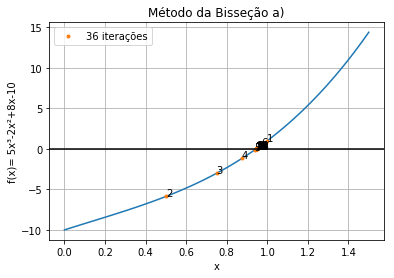

In [0]:

#f1 = lambda x: 4*math.sin(x) - math.exp(x)

inicio = 0.0
final = 1.5
numero_pontos = 100

curve = np.linspace(inicio,final,numero_pontos+1)

values = [fa(value) for value in curve]

#raizes_bissecao = [0.0, 0.5, 0.25, 0.375, 0.3125, 0.34375, 0.359375] 
#bissecao(f, -1, 1, 50, 1e-2)

x_aproximado = [fa(value) for value in b_a]

plt.plot(curve, values, linestyle='-')

plt.plot(b_a, x_aproximado, 'x', marker='.', label='' + str(len(b_a)) + ' iterações' )

i=0
for x,y in zip(b_a, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)= 5x³-2x²+8x-10')
plt.title('Método da Bisseção a)')

plt.axhline(0, color = "black")

plt.grid()

plt.savefig('pastinha/b_a.png')

plt.show()

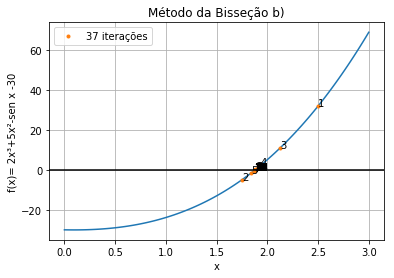

In [0]:

#f1 = lambda x: 4*math.sin(x) - math.exp(x)

inicio = 0.0
final = 3
numero_pontos = 100

curve = np.linspace(inicio,final,numero_pontos+1)

values = [fb(value) for value in curve]

#raizes_bissecao = [0.0, 0.5, 0.25, 0.375, 0.3125, 0.34375, 0.359375] 
#bissecao(f, -1, 1, 50, 1e-2)

x_aproximado = [fb(value) for value in b_b]

plt.plot(curve, values, linestyle='-')

plt.plot(b_b, x_aproximado, 'x', marker='.', label='' + str(len(b_b)) + ' iterações' )

i=0
for x,y in zip(b_b, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)= 2x³+5x²-sen x -30')
plt.title('Método da Bisseção b)')

plt.axhline(0, color = "black")

plt.grid()
plt.savefig('pastinha/b_b.png')

plt.show()

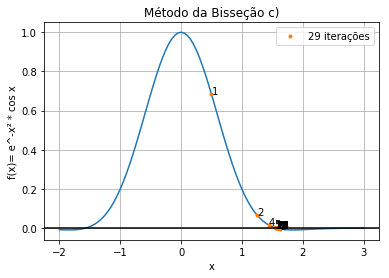

In [0]:


inicio = -2
final = 3
numero_pontos = 100

curve = np.linspace(inicio,final,numero_pontos+1)

values = [fc(value) for value in curve]

#raizes_bissecao = [0.0, 0.5, 0.25, 0.375, 0.3125, 0.34375, 0.359375] 
#bissecao(f, -1, 1, 50, 1e-2)

x_aproximado = [fc(value) for value in b_c]

plt.plot(curve, values, linestyle='-')

plt.plot(b_c, x_aproximado, 'x', marker='.', label='' + str(len(b_c)) + ' iterações' )

i=0
for x,y in zip(b_c, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)= e^-x² * cos x')
plt.title('Método da Bisseção c)')

plt.axhline(0, color = "black")

plt.grid()
plt.savefig('pastinha/b_c.png')

plt.show()

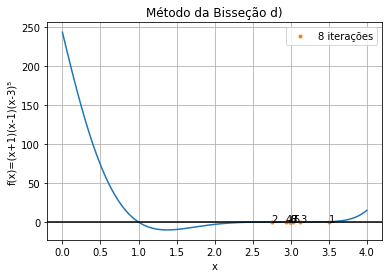

In [0]:

inicio = 0.0
final = 4
numero_pontos = 100

curve = np.linspace(inicio,final,numero_pontos+1)

values = [fd(value) for value in curve]

#raizes_bissecao = [0.0, 0.5, 0.25, 0.375, 0.3125, 0.34375, 0.359375] 
#bissecao(f, -1, 1, 50, 1e-2)

x_aproximado = [fd(value) for value in b_d]

plt.plot(curve, values, linestyle='-')

plt.plot(b_d, x_aproximado, 'x', marker='.', label='' + str(len(b_d)) + ' iterações' )

i=0
for x,y in zip(b_d, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)=(x+1)(x-1)(x-3)⁵')
plt.title('Método da Bisseção d)')

plt.axhline(0, color = "black")

plt.grid()
plt.savefig('pastinha/b_d.png')

plt.show()

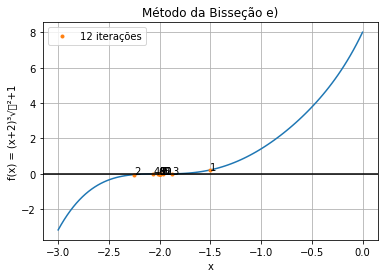

In [0]:


inicio = -3
final = 0
numero_pontos = 100

curve = np.linspace(inicio,final,numero_pontos+1)

values = [fe(value) for value in curve]

#raizes_bissecao = [0.0, 0.5, 0.25, 0.375, 0.3125, 0.34375, 0.359375] 
#bissecao(f, -1, 1, 50, 1e-2)

x_aproximado = [fe(value) for value in b_e]

plt.plot(curve, values, linestyle='-')

plt.plot(b_e, x_aproximado, 'x', marker='.', label='' + str(len(b_e)) + ' iterações' )

i=0
for x,y in zip(b_e, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x) = (x+2)³√𝑥²+1')
plt.title('Método da Bisseção e)')

plt.axhline(0, color = "black")

plt.grid()
plt.savefig('pastinha/b_e.png')

plt.show()

#Gráficos Falsa Posição


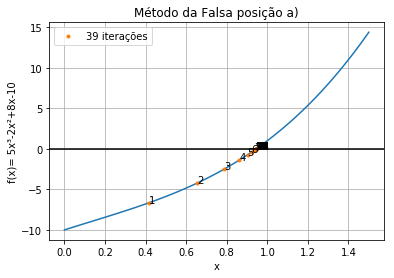

In [0]:
inicio = 0
final = 1.5
numero_pontos = 100

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fa(value) for value in curve]


x_aproximado = [fa(value) for value in f_a]

plt.plot(curve, values, linestyle='-')

plt.plot(f_a, x_aproximado, 'x', marker='.', label='' + str(len(f_a)) + ' iterações' )

i=0
for x,y in zip(f_a, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)= 5x³-2x²+8x-10')
plt.title('Método da Falsa posição a)')

plt.axhline(0, color = "black")

plt.grid()
plt.savefig('pastinha/f_a.png')

plt.show()

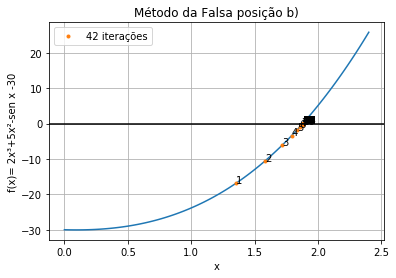

In [0]:
inicio = 0
final = 2.4
numero_pontos = 100

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fb(value) for value in curve]


x_aproximado = [fb(value) for value in f_b]

plt.plot(curve, values, linestyle='-')

plt.plot(f_b, x_aproximado, 'x', marker='.', label='' + str(len(f_b)) + ' iterações' )

i=0
for x,y in zip(f_b, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)= 2x³+5x²-sen x -30')
plt.title('Método da Falsa posição b)')

plt.axhline(0, color = "black")

plt.grid()

plt.savefig('pastinha/f_b.png')

plt.show()

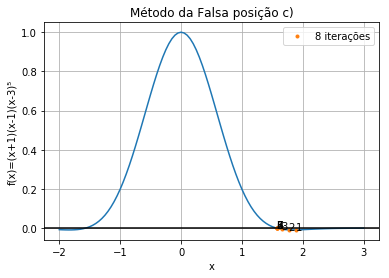

In [0]:
inicio = -2
final = 3
numero_pontos = 100

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fc(value) for value in curve]


x_aproximado = [fc(value) for value in f_c]

plt.plot(curve, values, linestyle='-')

plt.plot(f_c, x_aproximado, 'x', marker='.', label='' + str(len(f_c)) + ' iterações' )

i=0
for x,y in zip(f_c, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)=(x+1)(x-1)(x-3)⁵')
plt.title('Método da Falsa posição c)')

plt.axhline(0, color = "black")

plt.grid()
plt.savefig('pastinha/f_c.png')

plt.show()

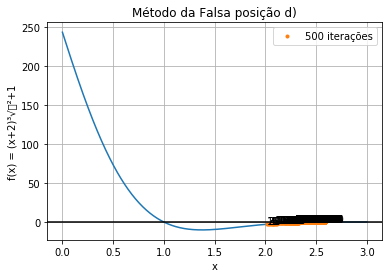

In [0]:
inicio = 0
final = 3
numero_pontos = 500

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fd(value) for value in curve]


x_aproximado = [fd(value) for value in f_d]

plt.plot(curve, values, linestyle='-')

plt.plot(f_d, x_aproximado, 'x', marker='.', label='' + str(len(f_d)) + ' iterações' )

i=0
for x,y in zip(f_d, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x) = (x+2)³√𝑥²+1')
plt.title('Método da Falsa posição d)')

plt.axhline(0, color = "black")

plt.grid()

plt.savefig('pastinha/f_d.png')

plt.show()

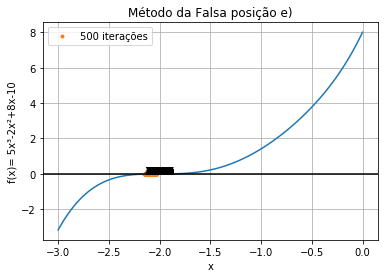

In [0]:
inicio = -3

final = 0
numero_pontos = 100

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fe(value) for value in curve]


x_aproximado = [fe(value) for value in f_e]

plt.plot(curve, values, linestyle='-')

plt.plot(f_e, x_aproximado, 'x', marker='.', label='' + str(len(f_e)) + ' iterações' )

i=0
for x,y in zip(f_e, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)= 5x³-2x²+8x-10')
plt.title('Método da Falsa posição e)')

plt.axhline(0, color = "black")

plt.grid()

plt.savefig('pastinha/f_e.png')

plt.show()

#Gráficos Newton/tangente

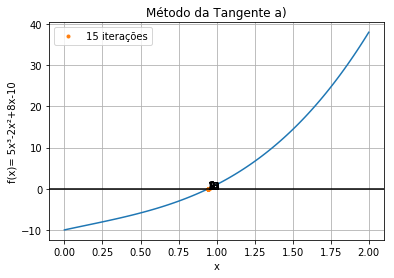

In [0]:
inicio = 0

final = 2
numero_pontos = 100

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fa(value) for value in curve]


x_aproximado = [fa(value) for value in n_a]

plt.plot(curve, values, linestyle='-')

plt.plot(n_a, x_aproximado, 'x', marker='.', label='' + str(len(n_a)) + ' iterações' )

i=0
for x,y in zip(n_a, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)= 5x³-2x²+8x-10')
plt.title('Método da Tangente a)')

plt.axhline(0, color = "black")

plt.grid()

plt.savefig('pastinha/n_a.png')

plt.show()

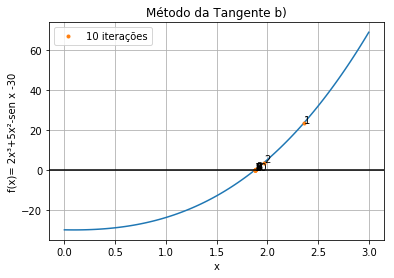

In [0]:
inicio = 0

final = 3
numero_pontos = 100

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fb(value) for value in curve]


x_aproximado = [fb(value) for value in n_b]

plt.plot(curve, values, linestyle='-')

plt.plot(n_b, x_aproximado, 'x', marker='.', label='' + str(len(n_b)) + ' iterações' )

i=0
for x,y in zip(n_b, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)= 2x³+5x²-sen x -30')
plt.title('Método da Tangente b)')

plt.axhline(0, color = "black")

plt.grid()
plt.savefig('pastinha/n_b.png')

plt.show()

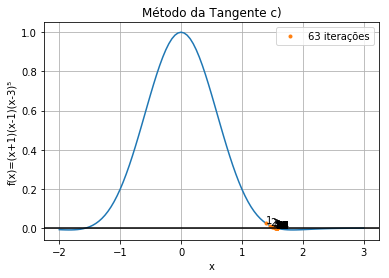

In [0]:
inicio = -2

final = 3
numero_pontos = 100

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fc(value) for value in curve]


x_aproximado = [fc(value) for value in n_c]

plt.plot(curve, values, linestyle='-')

plt.plot(n_c, x_aproximado, 'x', marker='.', label='' + str(len(n_c)) + ' iterações' )

i=0
for x,y in zip(n_c, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)=(x+1)(x-1)(x-3)⁵')
plt.title('Método da Tangente c)')

plt.axhline(0, color = "black")

plt.savefig('pastinha/n_c.png')

plt.grid()



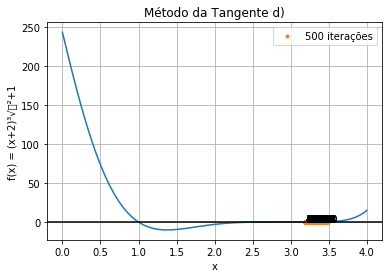

In [0]:
inicio = 0

final = 4
numero_pontos = 100

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fd(value) for value in curve]


x_aproximado = [fd(value) for value in n_d]

plt.plot(curve, values, linestyle='-')

plt.plot(n_d, x_aproximado, 'x', marker='.', label='' + str(len(n_d)) + ' iterações' )

i=0
for x,y in zip(n_d, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x) = (x+2)³√𝑥²+1')
plt.title('Método da Tangente d)')

plt.axhline(0, color = "black")

plt.grid()

plt.savefig('pastinha/n_d.png')

plt.show()

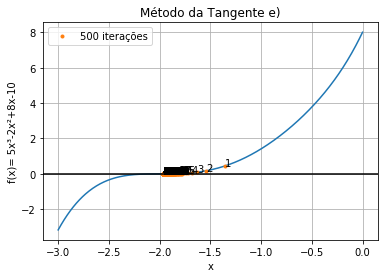

In [0]:
inicio = -3

final = 0
numero_pontos = 500

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fe(value) for value in curve]


x_aproximado = [fe(value) for value in n_e]

plt.plot(curve, values, linestyle='-')

plt.plot(n_e, x_aproximado, 'x', marker='.', label='' + str(len(n_e)) + ' iterações' )

i=0
for x,y in zip(n_e, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)= 5x³-2x²+8x-10')
plt.title('Método da Tangente e)')

plt.axhline(0, color = "black")

plt.grid()

plt.savefig('pastinha/n_e.png')

plt.show()

#Gráficos Secante

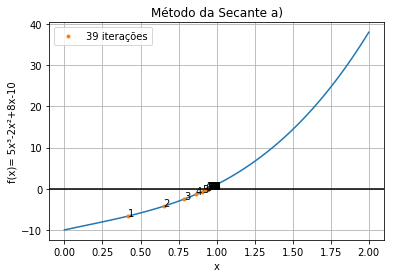

In [0]:
inicio = 0

final = 2
numero_pontos = 100

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fa(value) for value in curve]


x_aproximado = [fa(value) for value in s_a]

plt.plot(curve, values, linestyle='-')

plt.plot(s_a, x_aproximado, 'x', marker='.', label='' + str(len(s_a)) + ' iterações' )

i=0
for x,y in zip(s_a, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)= 5x³-2x²+8x-10')
plt.title('Método da Secante a)')

plt.axhline(0, color = "black")

plt.grid()

plt.savefig('pastinha/s_a.png')

plt.show()

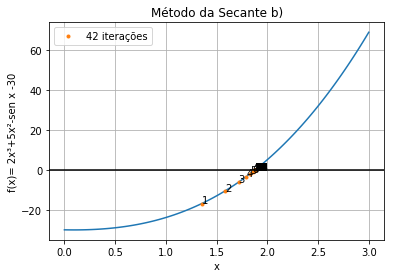

In [0]:
inicio = 0

final = 3
numero_pontos = 100

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fb(value) for value in curve]


x_aproximado = [fb(value) for value in s_b]

plt.plot(curve, values, linestyle='-')

plt.plot(s_b, x_aproximado, 'x', marker='.', label='' + str(len(s_b)) + ' iterações' )

i=0
for x,y in zip(s_b, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)= 2x³+5x²-sen x -30')
plt.title('Método da Secante b)')

plt.axhline(0, color = "black")

plt.grid()
plt.savefig('pastinha/s_b.png')

plt.show()

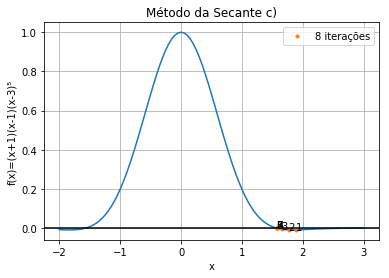

In [0]:
inicio = -2

final = 3
numero_pontos = 100

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fc(value) for value in curve]


x_aproximado = [fc(value) for value in s_c]

plt.plot(curve, values, linestyle='-')

plt.plot(s_c, x_aproximado, 'x', marker='.', label='' + str(len(s_c)) + ' iterações' )

i=0
for x,y in zip(s_c, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)=(x+1)(x-1)(x-3)⁵')
plt.title('Método da Secante c)')

plt.axhline(0, color = "black")

plt.grid()

plt.savefig('pastinha/s_c.png')


plt.show()

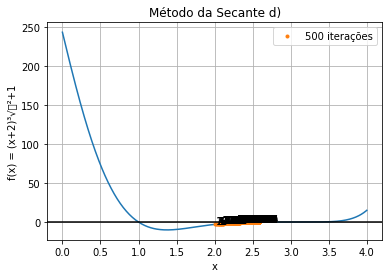

In [0]:
inicio = 0

final = 4
numero_pontos = 500

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fd(value) for value in curve]


x_aproximado = [fd(value) for value in s_d]

plt.plot(curve, values, linestyle='-')

plt.plot(s_d, x_aproximado, 'x', marker='.', label='' + str(len(s_d)) + ' iterações' )

i=0
for x,y in zip(s_d, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x) = (x+2)³√𝑥²+1')
plt.title('Método da Secante d)')

plt.axhline(0, color = "black")

plt.grid()


plt.savefig('pastinha/s_d.png')

plt.show()

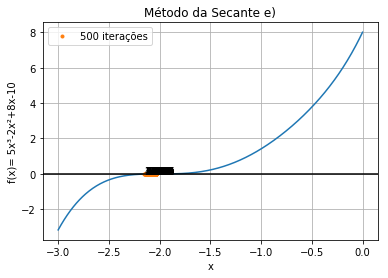

In [0]:
inicio = -3

final = 0
numero_pontos = 500

#fa2 = lambda x: 5*(x**3) -2*(x**2) +8*x -10

#print(fa)
curve = np.linspace(inicio,final,numero_pontos+1)

values = [fe(value) for value in curve]


x_aproximado = [fe(value) for value in s_e]

plt.plot(curve, values, linestyle='-')

plt.plot(s_e, x_aproximado, 'x', marker='.', label='' + str(len(s_e)) + ' iterações' )

i=0
for x,y in zip(s_e, x_aproximado):
    i = i+1
    plt.text(x,y,str(i))

leg = plt.legend();

plt.xlabel('x')
plt.ylabel('f(x)= 5x³-2x²+8x-10')
plt.title('Método da Secante e)')

plt.axhline(0, color = "black")

plt.grid()

plt.savefig('pastinha/s_e.png')

plt.show()

In [0]:
#baixa pastinha com as img dos gráficos no browser

!zip -r pastinha.zip pastinha
files.download('pastinha.zip')

  adding: pastinha/ (stored 0%)
  adding: pastinha/s_e.png (deflated 5%)
  adding: pastinha/s_c.png (deflated 5%)
  adding: pastinha/b_e.png (deflated 5%)
  adding: pastinha/f_e.png (deflated 5%)
  adding: pastinha/f_a.png (deflated 5%)
  adding: pastinha/f_b.png (deflated 5%)
  adding: pastinha/f_c.png (deflated 5%)
  adding: pastinha/n_c.png (deflated 6%)
  adding: pastinha/b_a.png (deflated 5%)
  adding: pastinha/n_b.png (deflated 5%)
  adding: pastinha/n_e.png (deflated 5%)
  adding: pastinha/f_d.png (deflated 6%)
  adding: pastinha/b_d.png (deflated 7%)
  adding: pastinha/s_b.png (deflated 5%)
  adding: pastinha/b_b.png (deflated 5%)
  adding: pastinha/s_a.png (deflated 5%)
  adding: pastinha/s_d.png (deflated 6%)
  adding: pastinha/n_a.png (deflated 5%)
  adding: pastinha/n_d.png (deflated 6%)
  adding: pastinha/b_c.png (deflated 5%)


In [0]:
!ls pastinha


b_a.png  b_d.png  f_b.png  f_e.png  n_c.png  s_a.png  s_d.png
b_b.png  b_e.png  f_c.png  n_a.png  n_d.png  s_b.png  s_e.png
b_c.png  f_a.png  f_d.png  n_b.png  n_e.png  s_c.png
